In [10]:
import numpy as np
np.random.seed(1)
n_bits=10
n_pop=6
pop=[np.random.randint(0,2,n_bits).tolist() for _ in range(n_pop)]

def objective(b):
    X1=int("".join(list(map(str,b[:5]))),2)
    x1=(0.5/31)*X1
    X2=int("".join(list(map(str,b[5:]))),2)
    x2=(0.5/31)*X2
    
    f=x1+x2-2*x1*x1-x2*x2+x1*x2
    return 1/(1+f)

#crossover
def crossover(p1,p2):
    pt=np.random.randint(1,len(p1)-2)
    c1=p1[:pt]+p2[pt:]
    c2=p2[:pt]+p1[pt:]
    return [c1,c2]

#mutation
def mutation(bit,r_mut):
    for i in range(len(bit)):
        if np.random.random_sample()<r_mut:
            bit[i]=1-bit[i]

for gen in range(12):
    
    scores=[objective(c) for c in pop]
    sum_scores=sum(scores)
    prob=[x/sum_scores for x in scores]
    cum_prob=[sum(prob[:i+1]) for i in range(len(prob))]
    #print(cum_prob)
    random_prob=[np.random.random_sample() for _ in range(len(pop))]
    #print(random_prob)
    selection_index=[]
    for x in random_prob:
        for i in range(len(cum_prob)):
            if cum_prob[i]>=x:
                selection_index.append(i)
                break
    #print(selection_index)
    parents=[pop[i] for i in selection_index]
    #print(parents)
    #next generation
    children=[]
    for i in range(0,len(pop),2):
        p1,p2=parents[i],parents[i+1]
        for c in crossover(p1,p2):
            mutation(c,0.0)
            children.append(c)
    pop=children
    #print("f(x) = ",objective(pop[0]))
    #if objective(pop[0])==1:
        #break
    if sum_scores/len(scores)==1:
        break
    
print("x1 = ",(0.5/31)*int("".join(list(map(str,pop[0][:5]))),2))
print("x2 = ",(0.5/31)*int("".join(list(map(str,pop[0][5:]))),2))
print("no of generations = ",gen+1)
print("Final population")
pop

x1 =  0.14516129032258063
x2 =  0.4193548387096774
no of generations =  12
Final population


[[0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 1, 1, 0, 1, 0]]

In [54]:
0.5-0.5

0.0

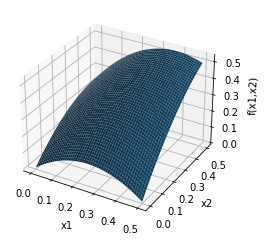

In [9]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
x=np.outer(np.linspace(0,0.5,1000),np.ones(1000))
y=x.copy().T
z=x+y-2*x*x-y*y+x*y
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(x,y,z)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1,x2)")
plt.show()